# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [76]:
#import your libraries
%reset -f
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#etc

#your info here
__author__ = "Kartik Athale "
__email__ = "Kartik.athale@outlook.com"

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [77]:
#load the data into a Pandas dataframe

# Path of the file to read.
#Sal_pred_path = 'C:\\Users\\Kartik Athale\\Desktop\\Big Data Program\\DSDJ\\Portfolio\\salarypredictionportfolio\\data'

#train_df = pd.read_csv('C:\\Users\\Kartik Athale\\Desktop\\Big Data Program\\DSDJ\\Portfolio\\salarypredictionportfolio\\data\\train_salaries.csv')

train_sal_df = pd.read_csv('data/train_salaries.csv')
train_feature_df = pd.read_csv('data/train_features.csv')
test_feature_df = pd.read_csv('data/test_features.csv')


### Observing Data ..

In [78]:
train_sal_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [79]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [80]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


###  Data types and dimention..

In [13]:
print('Target Salary Dimension', train_sal_df.shape)
print('train_feature Dimension',train_feature_df.shape)
print('test_feature_df Dimension',test_feature_df.shape)

Target Salary Dimension (1000000, 2)
train_feature Dimension (1000000, 8)
test_feature_df Dimension (1000000, 8)


In [15]:
train_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [18]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### ---- 3 Clean the data ----

In [81]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
# Checking for NAs in the Dataset.
print("---Salary dataset---")
print(train_sal_df.isna().sum())
print()
print("---Train dataset---")
print(train_feature_df.isna().sum())
print()
print("---Test dataset---")
print(test_feature_df.isna().sum())

---Salary dataset---
jobId     0
salary    0
dtype: int64

---Train dataset---
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

---Test dataset---
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [82]:
train_sal_df.duplicated().sum()

0

In [83]:
train_feature_df.duplicated().sum()

0

In [84]:
test_feature_df.duplicated().sum()

0

In [85]:
# Merge the features and salaries on jobId, 
train_df = pd.merge(train_feature_df, train_sal_df, on='jobId')

In [86]:
del train_feature_df
del train_sal_df

In [87]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [88]:
train_df.groupby(['jobType'])[['salary']].mean()

,salary
jobType,
CEO,145.311425
CFO,135.458547
CTO,135.479983
JANITOR,70.813045
JUNIOR,95.331557
MANAGER,115.367596
SENIOR,105.487775
VICE_PRESIDENT,125.367629


In [89]:
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [90]:
# There are 10000 Unique Jobid for every individual, hence it can be removed.!!
train_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685161572,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


#### ---- Checking Outliers ---
From train_df.describe() and boxplot below, it is confirmed - there are few records with salary = 0

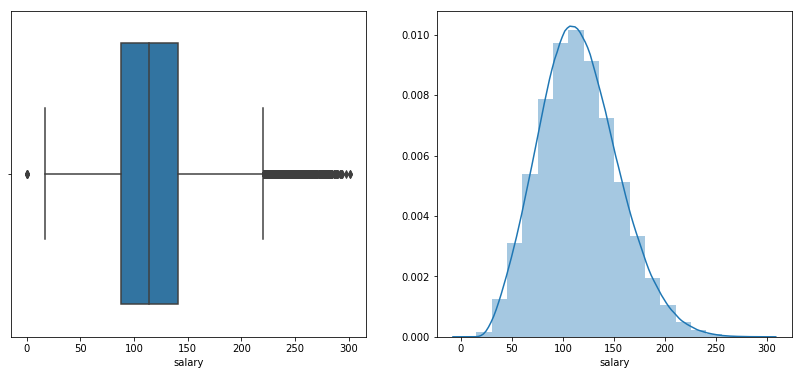

In [91]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(train_df['salary'], bins = 20)
plt.show()

In [92]:
#Checking for Invalid data, if Salary <= 0
train_df[train_df.salary <= 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [93]:
# Removing records with Salary = 0
train_df = train_df[train_df.salary > 0]

In [94]:
#check potential outlier above upper bound: (Salary > 220K cases, as observed from distplot)
train_df.loc[train_df.salary > 220.0, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

We notice that there are few entries with Junior post and salary about 200K, lets examine them

In [13]:
train_df[(train_df.salary > 220.0) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


We observe that most cases are from OIL and Finance sector with higher degree. Hence they seem to be valid, even though 
the jobType is 'Junior'

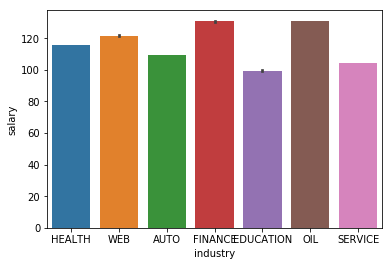

In [95]:
sns.barplot(x='industry',y='salary',data=train_df)

Oil and Finance sector have highest mean salary

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

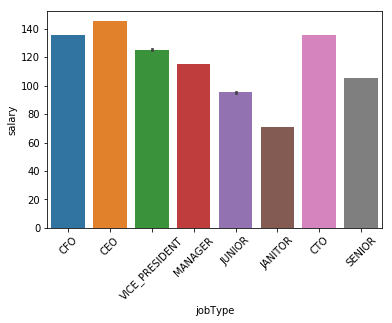

In [37]:
sns.barplot(x='jobType',y='salary',data=train_df)
plt.xticks(rotation=45)

Above Graph shows CEO, CTO and CFO Post has highest Salary structure, as expected.

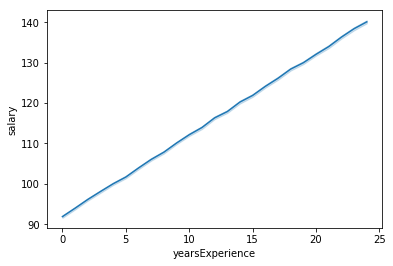

In [46]:
sns.lineplot(x='yearsExperience',y='salary',data=train_df)

Clearly Salary Increases with Years of Experience.

Identify Numeric and Categorical variables and transform categorical ones. jobid column not considered.

In [96]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']

In [97]:
train_df = pd.get_dummies(train_df, columns = categorical_cols)  

In [98]:
train_df.head()

,jobId,yearsExperience,milesFromMetropolis,salary,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,10,83,130,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,3,73,101,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,8,17,142,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Identify Feature and Target Variable for ML Models

In [102]:
features_df = train_df.drop(labels = ["jobId","salary" ], axis = 1)

In [103]:
target_var = train_df.salary

In [104]:
features_df.head()
#features_df.dtypes

,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [105]:
target_var.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [106]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(features_df, target_var, test_size = 0.20,  random_state=1)


Decision Tree Regressor

In [ ]:
## Start with simple Model.
DT_Model = DecisionTreeRegressor(random_state=1)
# Fit Model
DT_Model.fit(train_X, train_y)


In [108]:
# get predicted Salary on validation data
val_predictions = DT_Model.predict(val_X)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(val_y, val_predictions))

#mean_squared_error

698.3414656309392


Random Forest Regressor


In [109]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)


rf_predict = rf_model.predict(val_X)
print(mean_squared_error(val_y, rf_predict))


/home/kartik/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


429.37665770905306


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=1)

# fit your model
gbr_model.fit(train_X, train_y)


gbr_predict = gbr_model.predict(val_X)
print("gbr Model mean square error:", mean_squared_error(val_y, gbr_predict))

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

In [ ]:
rf_model = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=25, min_samples_split=60,
                                 max_features=30, verbose=0, random_state=2)

# fit your model
rf_model.fit(train_X, train_y)


rf_predict = rf_model.predict(val_X)
print(mean_squared_error(val_y, rf_predict))

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data